# **word2vec nlp tutorial**

> 比赛说明

标记的数据集由50,000条IMDB电影评论组成，专门用于情感分析。评论的情感是二元的，这意味着IMDB评分<5导致情绪分数为0，并且评分≥7的情绪评分为1.没有单独的电影具有超过30个评论。25,000个带有复审标签的训练集不包含与25,000个复习测试集相同的电影。此外，还有另外50,000个IMDB评论没有提供任何评级标签。

> 文件说明

| 文件 | 说明 |
| :--- | :--- |
| labeledTrainData | 标记的训练集。该文件是制表符分隔的，并且有一个标题行，后面跟着25,000行，其中包含每个审阅的ID，情绪和文本。 |
| testData | 测试集。制表符分隔的文件有一个标题行，后面跟着25,000行，其中包含每个评论的标识和文本。你的任务是预测每个人的情绪。 |
| unlabeledTrainData | 一个没有标签的额外训练集。制表符分隔的文件有一个标题行，后跟50,000行，每行包含一个标识和文本。  |
| sampleSubmission | 以正确格式的逗号分隔的示例提交文件。 |

> 数据字段

| 字段 | 说明 |
| :--- | :--- |
| id | 每个评论的唯一ID |
| sentiment | 审查的情绪; 1为正面评论，0为负面评论 |
| review | 审查的文本 |


# 比赛操作流程

分类问题：预测的是好与坏的问题
常用算法： K紧邻(knn)、逻辑回归(LogisticRegression)、随机森林(RandomForest)、支持向量机(SVM)、xgboost、GBDT

> 步骤:

```
一. 数据分析
1. 下载并加载数据
2. 总体预览:了解每列数据的含义,数据的格式等
3. 数据初步分析,使用统计学与绘图:初步了解数据之间的相关性,为构造特征工程以及模型建立做准备

二. 特征工程
1.根据业务,常识,以及第二步的数据分析构造特征工程.
2.将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)

三. 模型选择
1.根据目标函数确定学习类型,是无监督学习还是监督学习,是分类问题还是回归问题等.
2.比较各个模型的分数,然后取效果较好的模型作为基础模型.

四. 模型融合

五. 修改特征和模型参数
1.可以通过添加或者修改特征,提高模型的上限.
2.通过修改模型的参数,是模型逼近上限
```

* * * 

* 比赛地址: https://www.kaggle.com/c/word2vec-nlp-tutorial
* 参考地址: https://www.cnblogs.com/zhao441354231/p/6056914.html
* 参考地址: https://blog.csdn.net/lijingpengchina/article/details/52250765


## 一.数据分析

### 数据下载和加载

* 数据集下载地址: https://www.kaggle.com/c/word2vec-nlp-tutorial/data


In [1]:
# 导入相关数据包
import pandas as pd
import numpy as np
from bs4 import *

### 读取数据

In [2]:
import os
data_dir = "/opt/data/kaggle/getting-started/word2vec-nlp-tutorial"
# 载入数据集       
train = pd.read_csv(os.path.join(data_dir, 'labeledTrainData.tsv'), header=0, delimiter="\t", quoting=3)
pre = pd.read_csv(os.path.join(data_dir, 'testData.tsv'), header=0, delimiter="\t", quoting=3)

In [3]:
print(train.shape, '\t', pre.shape, '\t')
print(train.info(), '\n')
print('\n', train.columns.values)
print('\n', train.head(3))

(25000, 3) 	 (25000, 2) 	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB
None 


 ['id' 'sentiment' 'review']

          id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...


### 数据预处理

* 1.去掉html标签
* 2.移除标点
* 3.切分成词/token
* 4.去掉停用词
* 5.重组为新的句子

In [4]:
# def review_to_wordlist(review):
#     '''
#     把IMDB的评论转成词序列
#     参考：http://blog.csdn.net/longxinchen_ml/article/details/50629613
#     '''
#     # 去掉HTML标签，拿到内容
#     review_text = BeautifulSoup(review, "html.parser").get_text()
#     # 用正则表达式取出符合规范的部分
#     review_text = re.sub("[^a-zA-Z]", " ", review_text)
#     # 小写化所有的词，并转成词list
#     words = review_text.lower().split()
#     # 返回words
#     return words


# 预处理数据
label = train['sentiment']
train_data = []
pre_data = []
for i in range(len(train['review'])):
    train_data.append(BeautifulSoup(train['review'][i], "html.parser").get_text())
test_data = []
for i in range(len(pre['review'])):
    pre_data.append(BeautifulSoup(pre['review'][i], "html.parser").get_text())

In [5]:
# 预览数据
print(train_data[0], '\n')
print(pre_data[0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

## 特征处理

In [6]:
# 合并训练和测试集以便进行TFIDF向量化操作
data_all = train_data + pre_data
len_train = len(train_data)

直接丢给计算机这些词文本，计算机是无法计算的，因此我们需要把文本转换为向量，有几种常见的文本向量处理方法，比如： 

1. Bow-of-Words计数 
2. TF-IDF向量 
3. Word2vec向量 

In [24]:
from nltk.corpus import stopwords
#英文停止词，set()集合函数消除重复项
list_stopWords = list(set(stopwords.words('english')))
print(list_stopWords)

['have', 'yourselves', 'itself', "haven't", 'y', 'shan', 'because', 'didn', 'it', "she's", 'nor', 'once', 'hadn', 'an', 'will', 'in', 'than', 'just', "doesn't", 'down', "mightn't", 've', 'shouldn', 'before', 'when', 'and', 'won', 'which', "wouldn't", 'other', 'are', 'doesn', 'here', 'him', 'why', "mustn't", 'theirs', 'ours', 'himself', 'now', 'at', 'but', 'its', 'were', 'whom', 'how', 'again', 'under', 'myself', 'me', 'your', 'then', 'he', 'the', 'who', 'herself', 'off', 'aren', 'each', 'same', 'all', "that'll", 'so', 'having', 'that', 'couldn', 'she', 'wasn', 'own', "shouldn't", 'by', 'there', 'this', 'we', 'if', 'no', 'doing', 'don', 'ain', "you've", 'had', 't', 'into', 'too', 'hasn', 'they', 'few', 'their', 'being', 'mightn', "you'd", 'a', 'her', "couldn't", 'did', "you'll", 'd', 'can', 'been', 'm', 'yours', 'very', 'wouldn', 'i', 'his', 'during', 'through', 'you', 'against', 'be', 'themselves', 'not', 'out', "don't", 'is', "it's", 'was', 'does', 'ma', 'needn', 'these', 'some', 'on'

In [25]:
from gensim import corpora

# bow 模型    
import re
texts = [[word for word in re.sub("[^a-zA-Z]", " ", doc.lower()) if word != "" and word not in list_stopWords] for doc in data_all]
dictionary = corpora.Dictionary(texts)
# 对每一行的单词，进行统计出现次数
corpus = [dictionary.doc2bow(text) for text in texts]

In [26]:
for key in dictionary.keys()[0:5]:
    print (key, dictionary[key])

print(corpus[0])

0  
1 b
2 c
3 e
4 f
[(0, 471), (1, 29), (2, 56), (3, 206), (4, 37), (5, 42), (6, 102), (7, 19), (8, 18), (9, 82), (10, 115), (11, 31), (12, 3), (13, 72), (14, 53), (15, 15), (16, 41), (17, 3), (18, 1)]


### 2.TF-IDF + Lsi主题模型

In [10]:
from gensim import models
tfidf_model = models.TfidfModel(corpus=corpus, id2word=dictionary, normalize=True) 
# 将整个corpus转为tf-idf格式
corpus_tfidf = tfidf_model[corpus]

In [ ]:
## lsi 主题模型，作为特征向量
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=200)
corpus_lsi = lsi_model[corpus_tfidf]

# 提取数字，转化为numpy的矩阵
all_x = [[v for k,v in doc] for doc in corpus_lsi]

In [54]:
# print(np.shape(corpus_lsi))
# (50000, 200, 2)
print(lsi_model.print_topics(3))
# print(corpus_lsi[0])

import numpy as np
print(np.shape(all_x))

[(0, '0.162*"movie" + 0.140*"film" + 0.102*"-" + 0.099*"good" + 0.099*"like" + 0.098*"really" + 0.098*"bad" + 0.092*"one" + 0.089*"would" + 0.088*"story"'), (1, '0.276*"bad" + 0.238*"movie" + 0.180*"worst" + -0.156*"-" + 0.153*"movies" + 0.113*"waste" + 0.108*"ever" + 0.106*"acting" + 0.106*"terrible" + -0.101*"film"'), (2, '-0.667*"show" + -0.212*"episode" + -0.203*"series" + 0.160*"-" + 0.153*"film" + -0.146*"season" + -0.145*"episodes" + -0.135*"tv" + -0.130*"shows" + -0.125*"funny"')]
(50000, 200)


### 3.Word2vec向量

神经网络语言模型 L = SUM[log(p(w|contect(w))]，即在w的上下文下计算当前词w的概率，由公式可以看到，我们的核心是计算p(w|contect(w)， Word2vec给出了构造这个概率的一个方法。

In [27]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# def show_diff(origin, html, text):
#     print(origin)
#     print("\n-----------show diff-----------\n")
#     print(html)
#     print("\n-----------show diff-----------\n")
#     print(text)

# origin = train['review'][0]
# html = BeautifulSoup(origin, "html.parser").get_text()
# text = re.sub('[^a-zA-Z]', ' ', html).strip()
# show_diff(origin, html, text)

stopwords = set(stopwords.words("english"))

def review_to_sentence(review):
    html = BeautifulSoup(review, "html.parser").get_text()
    text = re.sub('[^a-zA-Z]', ' ', html).strip()
    words = [word for word in text.lower().split() if word not in stopwords]
    return words

unlabeled_train = pd.read_csv(os.path.join(data_dir, 'unlabeledTrainData.tsv'), header=0, delimiter="\t", quoting=3 )
train_texts = pd.concat([train['review'], unlabeled_train['review']])
sentences = list(map(review_to_sentence, train_texts))

In [28]:
print(np.shape(sentences))

(75000,)


In [31]:
import time
from gensim.models import Word2Vec
# 模型参数
num_features = 784    # Word vector dimensionality(原来默认用300维，为了计算CNN, 设置 784维 = 28*28)               
min_word_count = 10   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [32]:
%%time
# 训练模型
print("训练模型中...")
# model = Word2Vec(sentences, workers=num_workers, \
#             size=num_features, min_count=min_word_count, \
#             window=5, sample=downsampling)
model = Word2Vec(sentences, size=num_features, window=5)
print("训练完成")

训练模型中...
训练完成
CPU times: user 7min 17s, sys: 6.85 s, total: 7min 24s
Wall time: 3min 1s


In [33]:
np.shape(model["film"])

/Users/jiangzl/.virtualenvs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(784,)

In [34]:
model.wv.doesnt_match("man woman child kitchen".split())

'kitchen'

In [35]:
model.wv.doesnt_match("france england germany berlin".split())

'berlin'

In [36]:
model.wv.doesnt_match("paris berlin london austria".split())

'london'

In [37]:
model.wv.most_similar("man", topn=5)

[('men', 0.5552874803543091),
 ('lady', 0.5526503920555115),
 ('woman', 0.49917668104171753),
 ('mans', 0.47213518619537354),
 ('guy', 0.4668915569782257)]

In [38]:
model.wv.most_similar("queen", topn=5)

[('princess', 0.6967809200286865),
 ('bride', 0.6197341084480286),
 ('latifah', 0.6163896918296814),
 ('goddess', 0.6069524884223938),
 ('showgirl', 0.5752988457679749)]

In [39]:
model.wv.most_similar("awful", topn=5)

[('terrible', 0.8102608919143677),
 ('horrible', 0.7840115427970886),
 ('dreadful', 0.7728089690208435),
 ('horrid', 0.7526298761367798),
 ('atrocious', 0.7394574284553528)]

In [40]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('princess', 0.4752192795276642)]

In [41]:
def makeFeatureVec(words, model, num_features):
    '''
    对段落中的所有词向量进行取平均操作
    '''
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.

    # Index2word包含了词表中的所有词，为了检索速度，保存到set中
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])

    # 取平均
    featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    给定一个文本列表，每个文本由一个词列表组成，返回每个文本的词向量加和的平均值
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")

    for review in reviews:
        if counter % 5000 == 0:
            print("Review %d of %d" % (counter, len(reviews)))

        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1

    return reviewFeatureVecs

In [42]:
%time 
trainDataVecs = getAvgFeatureVecs(texts[:len_train], model, num_features)
print(np.shape(trainDataVecs))

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.2 µs
Review 0 of 25000


/Users/jiangzl/.virtualenvs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
(25000, 784)


In [43]:
%time 
testDataVecs = getAvgFeatureVecs(texts[len_train:], model, num_features)
print(np.shape(testDataVecs))

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 97 µs
Review 0 of 25000


/Users/jiangzl/.virtualenvs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
(25000, 784)


In [92]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.cross_validation import cross_val_score

gnb_model = GNB()
gnb_model.fit(trainDataVecs, label)

scores = cross_val_score(gnb_model, trainDataVecs, label, cv=10, scoring='roc_auc')
print("\n高斯贝叶斯分类器 10折交叉验证得分: \n", scores)
print("\n高斯贝叶斯分类器 10折交叉验证平均得分: \n", np.mean(scores))


高斯贝叶斯分类器 10折交叉验证得分: 
 [0.62715936 0.6181632  0.62577952 0.62458144 0.63289088 0.59956992
 0.61033216 0.62668192 0.610296   0.60734944]

高斯贝叶斯分类器 10折交叉验证平均得分: 
 0.618280384


## 机器学习 - 模型调参

### KNN 模型训练

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(all_x[:len_train], label)

scores = cross_val_score(knn_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\nknn算法 10折交叉验证得分: \n", scores)
print("\nknn算法 10折交叉验证平均得分: \n", np.mean(scores))


knn算法 10折交叉验证得分: 
 [0.82005056 0.81503776 0.83006976 0.8199152  0.82069568 0.827304
 0.81693088 0.8250944  0.80150176 0.821496  ]

knn算法 10折交叉验证平均得分: 
 0.8198095999999999


### 决策树 模型训练

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier()
tree_model.fit(all_x[:len_train], label)

scores = cross_val_score(tree_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\n决策树 10折交叉验证得分: \n", scores)
print("\n决策树 10折交叉验证平均得分: \n", np.mean(scores))


决策树 10折交叉验证得分: 
 [0.7392 0.7232 0.7292 0.7236 0.7412 0.7164 0.718  0.724  0.7124 0.7156]

决策树 10折交叉验证平均得分: 
 0.72428


### 逻辑回归 模型训练

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(C=0.1, max_iter=100)
lr_model.fit(all_x[:len_train], label)

scores = cross_val_score(lr_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\n逻辑回归 10折交叉验证得分: \n", scores)
print("\n逻辑回归 10折交叉验证平均得分: \n", np.mean(scores))


# from sklearn.model_selection import GridSearchCV

# # 设定grid search的参数
# grid_values = {'C': [1, 15, 30, 50]}  
# """
# penalty: l1 or l2, 用于指定惩罚中使用的标准。
# """
# model_LR = GridSearchCV(estimator=LR(penalty='l2', dual=True, random_state=0), grid_values, scoring='roc_auc', cv=20)
# model_LR.fit(train_x, label)

# 输出结果
# print(model_LR.cv_results_, '\n', model_LR.best_params_, model_LR.best_score_)


逻辑回归 10折交叉验证得分: 
 [0.94440064 0.94031744 0.95128192 0.94374784 0.9410656  0.94308864
 0.94733184 0.948768   0.93660352 0.94612288]

逻辑回归 10折交叉验证平均得分: 
 0.944272832


### SVM 模型训练

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# model = SVC(C=4, kernel='rbf')
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(all_x[:len_train], label)

scores = cross_val_score(svm_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\nSVM 10折交叉验证得分: \n", scores)
print("\nSVM 10折交叉验证平均得分: \n", np.mean(scores))


SVM 10折交叉验证得分: 
 [0.94539328 0.9421344  0.95242176 0.94563328 0.94189504 0.94408704
 0.94839424 0.94898688 0.93809024 0.9473792 ]

SVM 10折交叉验证平均得分: 
 0.945441536


In [152]:
svm_model = SVC(kernel='linear', probability=True)

### XGBoost 模型训练

In [107]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np

xgb_model = XGBClassifier(n_estimators=150, min_samples_leaf=3, max_depth=6)
"""
AttributeError: 'list' object has no attribute 'shape'
list => np.array
"""
xgb_model.fit(np.array(all_x[:len_train]), label)

scores = cross_val_score(xgb_model, np.array(all_x[:len_train]), label, cv=10, scoring='roc_auc')
print("\nXGB 10折交叉验证得分: \n", scores)
print("\nXGB 10折交叉验证平均得分: \n", np.mean(scores))


SVM 10折交叉验证得分: 
 [0.93396416 0.93105024 0.93927616 0.9332768  0.9338336  0.93682432
 0.93343296 0.93623296 0.92564352 0.93381504]

SVM 10折交叉验证平均得分: 
 0.933734976


## 模型融合

### bagging: 随机森林 

随机森林效果不好，去掉所有的树模型

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# parameters= {'n_estimators': range(10, 101, 10)}  
# gsearch_rf = GridSearchCV(
#     estimator=RandomForestClassifier(max_depth=8, random_state=0),
#     param_grid=parameters, scoring='roc_auc', cv=10)

# gsearch_rf = gsearch_rf.fit(all_x[:len_train], label)

# print(gsearch_rf.cv_results_, '\n', gsearch_rf.best_params_, '\t', gsearch_rf.best_score_)
"""
[mean: 0.87486, std: 0.00576, params: {'n_estimators': 10}, mean: 0.88505, std: 0.00611, params: {'n_estimators': 20}, mean: 0.89032, std: 0.00609, params: {'n_estimators': 30}, mean: 0.89246, std: 0.00537, params: {'n_estimators': 40}, mean: 0.89439, std: 0.00528, params: {'n_estimators': 50}, 
 mean: 0.89507, std: 0.00607, params: {'n_estimators': 60}, mean: 0.89591, std: 0.00618, params: {'n_estimators': 70}, mean: 0.89634, std: 0.00634, params: {'n_estimators': 80}, mean: 0.89671, std: 0.00607, params: {'n_estimators': 90}, mean: 0.89753, std: 0.00588, params: {'n_estimators': 100}] 

{'n_estimators': 100}  0.89753344
"""

rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
rf_model.fit(all_x[:len_train], label)

scores = cross_val_score(svm_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\n随机森林 10折交叉验证得分: \n", scores)
print("\n随机森林 10折交叉验证平均得分: \n", np.mean(scores))


随机森林 10折交叉验证得分: 
 [0.94539328 0.9421344  0.95242176 0.94563328 0.94189504 0.94408704
 0.94839424 0.94898688 0.93809024 0.9473792 ]

随机森林 10折交叉验证平均得分: 
 0.945441536


### boosting: AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

ab_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

ab_model.fit(all_x[:len_train], label)

scores = cross_val_score(ab_model, all_x[:len_train], label, cv=10, scoring='roc_auc')
print("\nAdaBoost 10折交叉验证得分: \n", scores)
print("\nAdaBoost 10折交叉验证平均得分: \n", np.mean(scores))


AdaBoost 10折交叉验证得分: 
 [0.9207616  0.91974976 0.92787136 0.91906176 0.92305856 0.92228416
 0.9224832  0.92169856 0.91816256 0.92096768]

AdaBoost 10折交叉验证平均得分: 
 0.9216099200000001


### voting: 多模型投票

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

"""
soft报错是因为这种投票方式使用的是每个分类器的概率输出值进行投票的。
所以要求每个分类器的输出是概率值，而不是一个类别。
对于svc来说，默认的输出是类别，所以会有问题，其他分类器不会有这样的问题。
"""

vot_model = VotingClassifier(
#     estimators=[('lr', lr_model), ('svm', svm_model), ('xgb', xgb_model), ('rf', rf_model), ('ab', ab_model)]
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='hard')
vot_model.fit(np.array(all_x[:len_train]), np.array(label))

scores = cross_val_score(vot_model, np.array(all_x[:len_train]), np.array(label), cv=10, scoring='roc_auc')
print("\nAdaBoost 10折交叉验证得分: \n", scores)
print("\nAdaBoost 10折交叉验证平均得分: \n", np.mean(scores))

### stacking: 模型

In [ ]:
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(y, 2)
len(skf)

In [ ]:
'''模型融合中使用到的各个单模型'''
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import StratifiedKFold

# 划分train数据集,调用代码,把数据集名字转成和代码一样
X = np.array(all_x[:len_train])
X_predict = np.array(all_x[len_train:])
label.astype(np.integer)
y = label.values

# clfs = [LogisticRegression(C=0.1, max_iter=100),
#         xgb.XGBClassifier(max_depth=6, n_estimators=100, num_round = 5),
#         RandomForestClassifier(n_estimators=100, max_depth=6, oob_score=True),
#         GradientBoostingClassifier(learning_rate=0.3, max_depth=6, n_estimators=100)]

clfs = [knn_model, tree_model, lr_model, svm_model, xgb_model, rf_model, ab_model]


# 创建n_folds
n_folds = 10
skf = StratifiedKFold(y, n_folds)


# 创建零矩阵
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 建立模型
for j, clf in enumerate(clfs):
    '''依次训练各个单模型'''
    # print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        '''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        # print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
    '''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

# 用建立第二层模型
stacking_model = LogisticRegression(C=0.1, max_iter=100)
stacking_model.fit(dataset_blend_train, y_train)

scores = cross_val_score(ab_model, dataset_blend_train, label, cv=10, scoring='roc_auc')
print("\nAdaBoost 10折交叉验证得分: \n", scores)
print("\nAdaBoost 10折交叉验证平均得分: \n", np.mean(scores))

## 数据导出

In [70]:
test_predicted = np.array(model_NB.predict(corpus_tfidf[len_train:]))
print('保存结果...')

import os
root_dir = "/opt/data/kaggle/getting-started/word2vec-nlp-tutorial"
        
submission_df = pd.DataFrame(data ={'id': test['id'], 'sentiment': test_predicted})
print(submission_df.head(10))
submission_df.to_csv(os.path.join(root_dir, 'submission_br.csv'), index = False)

print('结束.')

保存结果...
           id  sentiment
0  "12311_10"          1
1    "8348_2"          0
2    "5828_4"          1
3    "7186_2"          1
4   "12128_7"          1
5    "2913_8"          1
6    "4396_1"          0
7     "395_2"          0
8   "10616_1"          0
9    "9074_9"          1
结束.


'\n1.提交最终的结果到kaggle，AUC为：0.85728，排名300左右，50%的水平\n2. ngram_range = 3, 三元文法，AUC为0.85924\n'

## CNN 来处理 文本问题： https://zhuanlan.zhihu.com/p/26729228

### 分词，获取分割后的所有文章

In [7]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

def review_to_sentence(review):
    html = BeautifulSoup(review, "html.parser").get_text()
    text = re.sub('[^a-zA-Z]', ' ', html).strip()
    words = [word for word in text.lower().split() if word not in stopwords]
    return words

unlabeled_train = pd.read_csv(os.path.join(data_dir, 'unlabeledTrainData.tsv'), header=0, delimiter="\t", quoting=3 )
train_texts = pd.concat([train['review'], unlabeled_train['review']], axis=0, ignore_index=True)
sentences = list(map(review_to_sentence, train_texts))

In [8]:
np.shape(sentences), len(sentences[0]), len(sentences[1]), len(train['review']), len( unlabeled_train['review'])

((75000,), 219, 84, 25000, 50000)

### 对文章简历词典

In [9]:
from gensim import corpora
dictionary = corpora.Dictionary(sentences)

In [10]:
dictionary.add_documents([[" "]])

In [11]:
for key in dictionary.keys()[0:5]:
    print (key, dictionary[key])


0 actual
1 alone
2 also
3 another
4 anyway


In [12]:
len(dictionary.token2id), len(dictionary.id2token), type(dictionary.token2id), type(dictionary.id2token)

(123350, 123350, dict, dict)

In [13]:
dictionary.token2id["another"], dictionary.id2token[3], dictionary.token2id[" "]

(3, 'another', 123349)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F     # 激励函数都在这
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision     # 数据库模块

In [15]:
max_len = max([len(i) for i in sentences])
max_index = dictionary.token2id[" "]
max_list = [max_index for x in range(max_len)]
print(max_len, "\n", len(max_list))

1416 
 1416


In [362]:
# # prepare_sequence 是将文本的索引转化为 Variable 对象
# def prepare_sequence(seq):
#     idxs = [dictionary.token2id[w] for w in seq]
#     if len(idxs) < max_len:
#         idxs = idxs + max_list[len(idxs):]
# #     print('文本词典的索引序列：', idxs)
#     tensor = torch.LongTensor(idxs)
#     return Variable(tensor)

# sentence_in = prepare_sequence(sentences[1383])
# # word_embeddings = nn.Embedding(len(dictionary.token2id), 5)
# # word_embeddings(sentence_in)
# x = cnn(sentence_in)
# print(x)

Variable containing:
1.00000e-02 *
  5.6823 -5.1981
[torch.FloatTensor of size 1x2]



In [319]:
# sentence_in.data.size(0)

1416

In [320]:
# sentences[0][:3], "\n\n", len(sentence_in)

(['stuff', 'going', 'moment'], '\n\n', 1416)

### 拆分数据集

In [16]:
# prepare_sequence 是将文本的索引转化为 Variable 对象
def prepare_sequence(seq):
    idxs = [dictionary.token2id[w] for w in seq]
    if len(idxs) < max_len:
        idxs = idxs + max_list[len(idxs):]
#     print('文本词典的索引序列：', idxs)
    return idxs


from sklearn.model_selection import train_test_split

X_train = list(map(prepare_sequence, sentences[:len(train)]))
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_train, label.tolist(), test_size=0.2, shuffle=True, random_state=42)


In [17]:
type(X_train_d), type(y_train_d)

(list, list)

In [18]:
np.shape(X_train_d), np.shape(X_test_d), np.shape(y_train_d), np.shape(y_test_d)

((20000, 1416), (5000, 1416), (20000,), (5000,))

In [19]:
X_train_d[0][:3], X_test_d[0][:3], y_train_d[:3], y_test_d[:3]

([100, 1380, 2330], [509, 58, 14209], [0, 0, 0], [0, 1, 0])

In [20]:
class textCNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, max_len, n_classes):
        super(textCNN, self).__init__()
        
        self.model_name = 'alexnet'
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.max_len = max_len
        
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        self.features = nn.Sequential(
#             nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),

#             nn.Conv2d(64, 192, kernel_size=5, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),

#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),

#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),

#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
            
            nn.Conv2d(1, 16, 5, 1, 2),
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2, stride=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14), 默认步长为2
    
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)

            nn.Conv2d(32, 64, 5, 1, 2),  
            nn.ReLU(),  
            nn.MaxPool2d(2), 
    
            nn.Conv2d(64, 128, 5, 1, 2),  
            nn.ReLU(),  
            nn.MaxPool2d(2)
        )
        
        self.classifier = nn.Sequential(
#             nn.Dropout(),
#             nn.Linear(256 * 6 * 6, 4096),
#             nn.ReLU(inplace=True),

#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),

#             nn.Linear(4096, n_classes),
            
            nn.Dropout(),
            nn.Linear(45056, n_classes),   
        )
 
    def forward(self, x):
        x = self.word_embeddings(x)
        x = x.view(len(x), 1, self.max_len, self.embedding_dim)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        output = self.classifier(x)
        return output     # return x for visualization


In [21]:
cnn = textCNN(len(dictionary.token2id), 64, max_len, 2)
print(cnn)  # net architecture

# optimizer = torch.optim.SGD(cnn.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# lr 优化步长
# weight_decay(权重衰减): 也叫 L2 regularization  (1e-5就是 1*(10的-5次方)即0.00001)
optimizer = torch.optim.Adam(cnn.parameters(), lr=1e-5, weight_decay=1e-7)
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = nn.CrossEntropyLoss()

textCNN(
  (word_embeddings): Embedding(123350, 64)
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=45056, out_features=2, bias=True)
  )
)


In [22]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

In [31]:
tr_x = torch.LongTensor(X_train_d)
tr_y = torch.LongTensor(y_train_d)
te_x = torch.LongTensor(X_test_d)
te_y = torch.LongTensor(y_test_d)

torch_train_dataset = Data.TensorDataset(data_tensor=tr_x, target_tensor=tr_y)
torch_test_dataset = Data.TensorDataset(data_tensor=te_x, target_tensor=te_y)

BATCH_SIZE = 20      # 批训练的数据个数

# 把 dataset 放入 DataLoader
train_loader = Data.DataLoader(
    dataset=torch_train_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,            # 每个 batch 加载多少个样本
    shuffle=True,                     # 要不要打乱数据 (打乱比较好)
    num_workers=2,                    # 多线程来读数据
)
test_loader = Data.DataLoader(
    dataset=torch_test_dataset,       # torch TensorDataset format
    batch_size=BATCH_SIZE,            # 每个 batch 加载多少个样本
    shuffle=True,                     # 要不要打乱数据 (打乱比较好)
    num_workers=2,                    # 多线程来读数据
)

In [34]:
from sklearn.metrics import log_loss

Epoch = 5
print_every = 20
max_step = len(X_train_d)/BATCH_SIZE

# 跟踪绘图的损失
current_loss = 0
all_losses = []

for epoch in range(Epoch):
    for step, (batch_x,  batch_y) in enumerate(train_loader):  # 每一步 loader 释放一小批数据用来学习
        b_x = Variable(batch_x)   # batch x
        b_y = Variable(batch_y)   # batch y
        
        out = cnn(b_x)                 # 喂给 net 训练数据 x, 输出分析值
        loss = loss_func(out, b_y)     # 计算两者的误差

        optimizer.zero_grad()   # 清空上一步的残余更新参数值
        loss.backward()         # 误差反向传播, 计算参数更新值
        optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

        current_loss += loss.data[0]
        # print(F.softmax(out), '---', torch.max(F.softmax(out), 1), 'xxx', torch.max(F.softmax(out), 1)[1])
        if step % print_every == print_every-1:
            # softmax 用来计算输出分类的概率，然后max是选出最大的一组：(概率值，分类值)
            prediction = torch.max(F.softmax(out, dim=1), 1)[1]
            pred_y = prediction.data.numpy().squeeze()
            target_y = b_y.data.numpy()
            print("pred_y:\t", pred_y)
            print("target_y:\t", target_y)
            logloss = log_loss(target_y, pred_y, eps=1e-15)
            accuracy = sum(pred_y == target_y)/len(target_y)  # 预测中有多少和真实值一样

            # 总次数
            loop_step = epoch*max_step + step
            total_step = Epoch*max_step
            print('%d-%d %.2f%% (%s) logloss=%.2f \t accuracy=%.2f \t loss=%s' % (epoch, loop_step, loop_step/total_step*100, timeSince(start), logloss, accuracy, loss.data[0]))

            all_losses.append(current_loss/print_every)
            current_loss = 0
     

pred_y:	 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
target_y:	 [0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0]
0-19 7.60% (101m 42s) logloss=12.09 	 accuracy=0.65 	 loss=0.6844480037689209
pred_y:	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
target_y:	 [1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0]
0-39 15.60% (103m 24s) logloss=15.54 	 accuracy=0.55 	 loss=0.6886069774627686
pred_y:	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
target_y:	 [0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1]
0-59 23.60% (106m 31s) logloss=12.09 	 accuracy=0.65 	 loss=0.6793051958084106
pred_y:	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
target_y:	 [0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1]
0-79 31.60% (114m 37s) logloss=22.45 	 accuracy=0.35 	 loss=0.6999103426933289
pred_y:	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
target_y:	 [0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0]
0-99 39.60% (120m 29s) logloss=20.72 	 accuracy=0.40 	 loss=0.7069584131240845
pred_y:	 [1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
target_y:	 [1 1 1 1 0 1 0 0 0 0 0 0

pred_y:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
target_y:	 [1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1]
0-919 367.60% (409m 9s) logloss=13.82 	 accuracy=0.60 	 loss=0.684188961982727
pred_y:	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
target_y:	 [1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0]
0-939 375.60% (416m 38s) logloss=17.27 	 accuracy=0.50 	 loss=0.7021096348762512
pred_y:	 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
target_y:	 [0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1]
0-959 383.60% (424m 14s) logloss=20.72 	 accuracy=0.40 	 loss=0.6950109004974365
pred_y:	 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
target_y:	 [0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0]
0-979 391.60% (431m 21s) logloss=17.27 	 accuracy=0.50 	 loss=0.6897827982902527
pred_y:	 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]
target_y:	 [0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0]
0-999 399.60% (438m 31s) logloss=15.54 	 accuracy=0.55 	 loss=0.6863324642181396
pred_y:	 [0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
target_y:	 [0 1 0 1 1 0 1 

pred_y:	 [1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
target_y:	 [0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1]
1-869 347.60% (672m 56s) logloss=17.27 	 accuracy=0.50 	 loss=0.6827632188796997
pred_y:	 [1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
target_y:	 [1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0]
1-889 355.60% (675m 13s) logloss=19.00 	 accuracy=0.45 	 loss=0.6897896528244019
pred_y:	 [0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0]
target_y:	 [0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0]
1-909 363.60% (677m 28s) logloss=15.54 	 accuracy=0.55 	 loss=0.6818998456001282
pred_y:	 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0]
target_y:	 [0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1]
1-929 371.60% (680m 31s) logloss=12.09 	 accuracy=0.65 	 loss=0.6927092671394348
pred_y:	 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
target_y:	 [0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0]
1-949 379.60% (685m 4s) logloss=19.00 	 accuracy=0.45 	 loss=0.69705730676651
pred_y:	 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0]
target_y:	 [0 0 1 0 0 1 0 0

pred_y:	 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
target_y:	 [1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1]
2-819 327.60% (788m 46s) logloss=19.00 	 accuracy=0.45 	 loss=0.7051876783370972
pred_y:	 [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
target_y:	 [0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1]
2-839 335.60% (791m 22s) logloss=15.54 	 accuracy=0.55 	 loss=0.6883013844490051
pred_y:	 [1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0]
target_y:	 [0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0]
2-859 343.60% (793m 51s) logloss=19.00 	 accuracy=0.45 	 loss=0.6974400877952576
pred_y:	 [0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1]
target_y:	 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1]
2-879 351.60% (796m 54s) logloss=5.18 	 accuracy=0.85 	 loss=0.6511715650558472
pred_y:	 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
target_y:	 [1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1]
2-899 359.60% (800m 12s) logloss=17.27 	 accuracy=0.50 	 loss=0.6897764801979065
pred_y:	 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
target_y:	 [0 0 1 1 1 0 1

pred_y:	 [1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
target_y:	 [0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0]
3-769 307.60% (904m 20s) logloss=17.27 	 accuracy=0.50 	 loss=0.6945109963417053
pred_y:	 [0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1]
target_y:	 [0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0]
3-789 315.60% (907m 19s) logloss=13.82 	 accuracy=0.60 	 loss=0.6908108592033386
pred_y:	 [1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1]
target_y:	 [1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1]
3-809 323.60% (909m 46s) logloss=15.54 	 accuracy=0.55 	 loss=0.6973456144332886
pred_y:	 [0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1]
target_y:	 [1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1]
3-829 331.60% (912m 25s) logloss=19.00 	 accuracy=0.45 	 loss=0.6773894429206848
pred_y:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
target_y:	 [1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1]
3-849 339.60% (914m 47s) logloss=15.54 	 accuracy=0.55 	 loss=0.6820051670074463
pred_y:	 [0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
target_y:	 [0 1 0 0 1 1 

Process Process-20:
Process Process-19:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jiangzl/.virtualenvs/python3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/Users/jiangzl/.virtualenvs/python3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import log_loss

Epoch = 1
print_every = 100
max_step = len(X_train_d)

# 跟踪绘图的损失
current_loss = 0
all_losses = []
pre_result = []
rea_result = []

for epoch in range(Epoch):
    # 优化为批处理
    
    # step = len(X_train_d)/BATCH_SIZE (train_loader 为 BATCH_SIZE 大小的集合)
    for step, (x, y) in enumerate(zip(X_train_d[1384:], y_train_d[1384:])):
        b_x = prepare_sequence(x)
        b_y = Variable(torch.LongTensor([y]))   # batch y
        
        out = cnn(b_x)                 # 喂给 net 训练数据 x, 输出分析值
        loss = loss_func(out, b_y)     # 计算两者的误差

        optimizer.zero_grad()   # 清空上一步的残余更新参数值
        loss.backward()         # 误差反向传播, 计算参数更新值
        optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

        current_loss += loss.data[0]

        prediction = torch.max(F.softmax(out, dim=1), 1)[1]
        pred_y = prediction.data.numpy()
        target_y = b_y.data.numpy()
        
#         print('预测---', pred_y)
#         print('目标---', target_y)
            
#         if step>2:
#             break

        # softmax 用来计算输出分类的概率，然后max是选出最大的一组：(概率值，分类值)
        prediction = torch.max(F.softmax(out, dim=1), 1)[1]
        pre_result.append(prediction.data.numpy()[0])
        rea_result.append(b_y.data.numpy()[0])
        
        # print(F.softmax(out), '---', torch.max(F.softmax(out), 1), 'xxx', torch.max(F.softmax(out), 1)[1])
        if step % print_every == print_every-1:
#             print('预测---', pred_y)
#             print('目标---', target_y)
            logloss = log_loss(rea_result, pre_result, eps=1e-15)
#             print("pre_result: \t", pre_result)
#             print("rea_result: \t", rea_result)
            accuracy = sum(np.array(pre_result) == np.array(rea_result))/len(rea_result)  # 预测中有多少和真实值一样
            
            # 总次数
            loop_step = epoch*max_step + step
            total_step = Epoch*max_step
            
            print('%d-%d %.2f%% (%s) logloss=%.2f \t accuracy=%.2f \t loss=%s' % (epoch, loop_step, loop_step/total_step*100, timeSince(start), logloss, accuracy, loss.data[0]))

            all_losses.append(current_loss/print_every)
            current_loss = 0
            pre_result = []
            rea_result = []


一，train loss与test loss结果分析

* train loss 不断下降，test loss不断下降，说明网络仍在学习;
* train loss 不断下降，test loss趋于不变，说明网络过拟合;
* train loss 趋于不变，test loss不断下降，说明数据集100%有问题;
* train loss 趋于不变，test loss趋于不变，说明学习遇到瓶颈，需要减小学习率或批量数目;
* train loss 不断上升，test loss不断上升，说明网络结构设计不当，训练超参数设置不当，数据集经过清洗等问题。


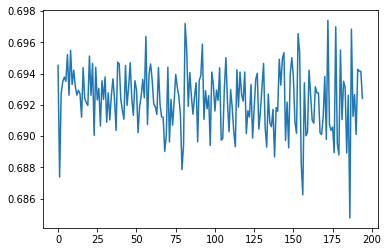

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

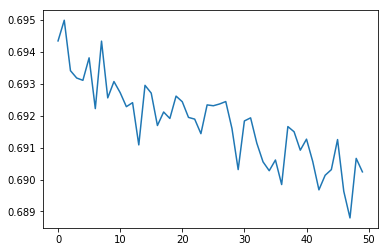

In [234]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [235]:
# 看看测试集合的正确率多高, 发现效果很差，说明一点。。（数据不均匀）

out_t = cnn(Variable(te_x))

# softmax 用来计算输出分类的概率，然后max是选出最大的一组：(概率值，分类值)
prediction_t = torch.max(F.softmax(out_t, dim=1), 1)[1]
pred_t_y = prediction_t.data.numpy().squeeze()
target_t_y = Variable(te_y).data.numpy()
logloss_t = log_loss(target_t_y, pred_t_y, eps=1e-15)
accuracy_t = sum(pred_t_y == target_t_y)/len(target_t_y)  # 预测中有多少和真实值一样
print('(%s) logloss=%.2f \t accuracy=%.2f' % (timeSince(start), logloss_t, accuracy_t))

(3m 30s) logloss=14.94 	 accuracy=0.57


In [236]:
# 又回头看看训练集合的正确率多高，严重说明：数据在采样的时候不均匀，倒是数据有丢失没学习到

out_t = cnn(Variable(tr_x[:10000]))

# softmax 用来计算输出分类的概率，然后max是选出最大的一组：(概率值，分类值)
prediction_t = torch.max(F.softmax(out_t, dim=1), 1)[1]
pred_t_y = prediction_t.data.numpy().squeeze()
target_t_y = Variable(tr_y[:10000]).data.numpy()
logloss_t = log_loss(target_t_y, pred_t_y, eps=1e-15)
accuracy_t = sum(pred_t_y == target_t_y)/len(target_t_y)  # 预测中有多少和真实值一样
print('(%s) logloss=%.2f \t accuracy=%.2f' % (timeSince(start), logloss_t, accuracy_t))

(3m 49s) logloss=14.25 	 accuracy=0.59


* * * 

其他的信息

In [ ]:
# 加载训练好的词向量

from gensim.models.word2vec import Word2Vec

model = Word2Vec.load_word2vec_format("vector.txt", binary=False)  # C text format
# model = Word2Vec.load_word2vec_format("vector.bin", binary=True)  # C

In [ ]:
# 加载 google 的词向量，查看单词之间关系

from gensim.models.word2vec import Word2Vec 
model = Word2Vec.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [ ]:
# 测试预测效果

print(model.most_similar(positive=["woman", "king"], negative=["man"], topn=5))
print(model.most_similar(positive=["biggest", "small"], negative=["big"], topn=5))
print(model.most_similar(positive=["ate", "speak"], negative=["eat"], topn=5))

In [ ]:
import numpy as np

with open("food_words.txt", "r") as infile:
    food_words = infile.readlines()
    
with open("sports_words.txt", "r") as infile:
    food_words = infile.readlines()
    
with open("weather_words.txt", "r") as infile:
    food_words = infile.readlines()
    
def getWordVecs(words):
    vec = []
    for word in words:
        word = word.replace("\n", "")
        try:
            vecs.append(model[word].reshape((1, 300)))
        except KeyError:
            continue
    
    # numpy提供了numpy.concatenate((a1,a2,...), axis=0)函数。能够一次完成多个数组的拼接
    """
    >>> a=np.array([1,2,3])
    >>> b=np.array([11,22,33])
    >>> c=np.array([44,55,66])
    >>> np.concatenate((a,b,c),axis=0)  # 默认情况下，axis=0可以不写
    array([ 1,  2,  3, 11, 22, 33, 44, 55, 66]) #对于一维数组拼接，axis的值不影响最后的结果
    """
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype="float")

food_vecs = getWordVecs(food_words)
sports_vecs = getWordVecs(sports_words)
weather_vecs = getWordVecs(weather_words)

In [ ]:
# 利用 TSNE 和 matplotlib 对分类结果进行可视化处理

from sklearn.manifold import TSEN
import matplotlib.pyplot as plt

ts = TSEN(2)
reduced_vecs = ts.fit_transform(np.concatenate((food_vecs, sports_vecs, weather_vecs)))

for i in range(len(reduced_vecs)):
    if i < len(food_vecs):
        color = "b"
    elif i >= len(food_vecs) and i <(len(food_vecs)+len(sports_vecs)):
        color = "r"
    else:
        color = "g"
    
    plt.plot(reduced_vecs[i, 0], reduced_vecs[i, 1], marker="0", color=color, marksize=8)

In [ ]:
# 首先，我们导入数据并构建 Word2Vec 模型：

from sklearn.cross_validation import train_ _test_ _split
from gensim.models.word2vec import Word2Vec

with open('twitter.data/pos_ tweets.txt', 'r') as infile:
    pos_tweets= infile.readlines()

with open(' twitter_ data/neg_ tweets.txt', 'r') as infile:
    neg_ _tweets = infile.readlines()

# use 1for positive sentiment,0 for negative
Y= np.concatenate((np.ones( len (pos_tweets )) ，np.zeros(len(neg_tweets))))

x_train,x_test,y_train,y_test = train_test_split(np.concatenate((pos_tweets, neg_tweets)), y, test_size=0.2)
# Do some very minor text preprocessing

def cleanText(corpus):
    corpus= [z.lower( ).replace(' \n' , '').split() for z in corpus]
    return corpus

x_ train= cleanText(x_ train)
x_ test= cleanText (x_ _test)

n _dim= 300
#Initialize model and build vocab
imdb_w2v= Word2Vec(size=n dim, min_count=10)
imdb_w2v.build_vocab(x_ _train)
#Train the model over train_ _reviews (this may take several minutes)
imdb_w2v.train( x_train)

In [ ]:
# 接下来，为了利用下面的函数获得推文中所有词向量的平均值，我们必须构建作为输入文本的词向量。

def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1，size))
    count= 0.

    for word in text :
        try:
            vec += imdb_w2v[word].reshape( (1，size) )
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec 1'= count
    return vec

In [ ]:
# 调整数据集的量纲是数据标准化处理的一部分，我们通常将数据集转化成服从均值为零的高斯分布，这说明数值大于均值表示乐观，反之则表示悲观。为了使模型更有效，许多机器学习模型需要预先处理数据集的量纲，特别是文本分类器这类具有许多变量的模型。

from sklearn.preprocessing import scale

train_vecs = np.concatenate([buildWordVector(z ，n_dim) for z in x_train])
train_vecs= scale(train_vecs)

# Train word2vec on test tweets
imdb_w2v.train(x_test)


In [ ]:
# 最后我们需要建立测试集向量并对其标准化处理：

#Build test tweet vectors then scale
test_vecs = np.concatenate( [buildWordVector( Z，n _dim) for z in x _test ])
test_vecs = scale(test_vecs)


In [ ]:
"""
接下来我们想要通过计算测试集的预测精度和 ROC 曲线来验证分类器的有效性。 ROC 曲线衡量当模型参数调整的时候，其真阳性率和假阳性率的变化情况。在我们的案例中，我们调整的是分类器模型截断阈值的概率。一般来说，ROC 曲线下的面积（AUC）越大，该模型的表现越好。你可以在这里找到更多关于 ROC 曲线的资料

（https://en.wikipedia.org/wiki/Receiver_operating_characteristic）

在这个案例中我们使用罗吉斯回归的随机梯度下降法作为分类器算法。
"""

#Use classification algorithm (i.e.Stochastic Logistic Regression) on training set, then assess model performance on test set

from sklearn.linear model import SGDClassifier
lr = SGDClassifier(loss='log' ，penalty='11' )
lr.fit(train_vecs, y_train)
print' Test Accuracy: %.2f' % r.score(test vecs, y_test )




In [ ]:
# 随后我们利用 matplotlib 和 metric 库来构建 ROC 曲线

#Crea t e ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

pred_probas = lr.predict_proba(test_vecs)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred_probas )
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label='area = %.2f' % roc_ auc)
plt.plot([0,1]，[0，1],'k--')
plt. xlim( [0. 0 ，1. 0 ])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.show()